# Minibatch Discrimination Test

**Objectives:**
  - Test whether the minibatch discrimination code works as intended (inspect model summary)
  - Test whether the minibatch discrimination code noticeably improves generated examples.

In [11]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import tensorflow as tf

import pickle

In [2]:
# mnist_ex.preprocess_real(save_only=True)
# real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
# real_train.shape
(real_train, _), _ = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [17]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [18]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

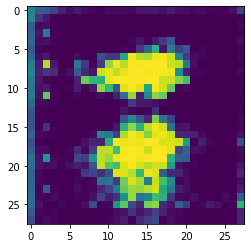

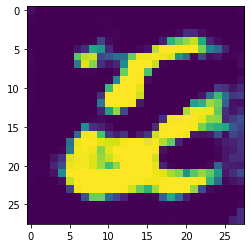

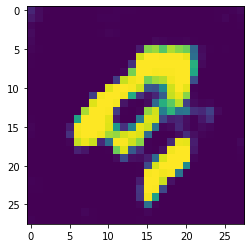

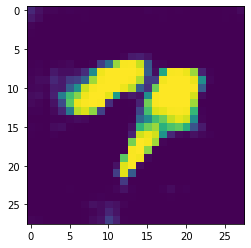

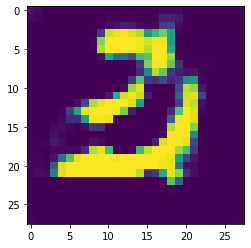

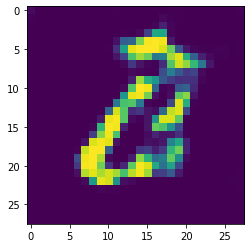

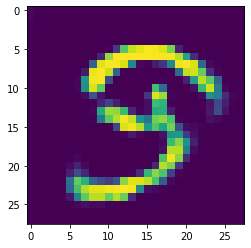

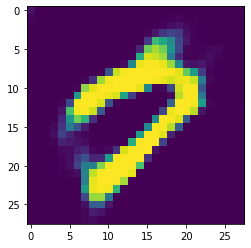

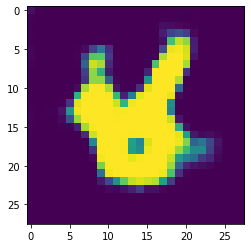

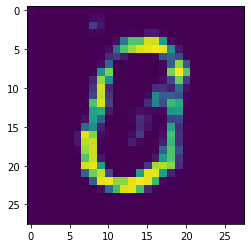

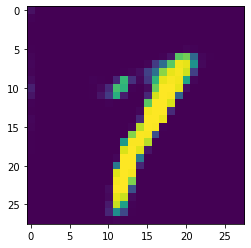

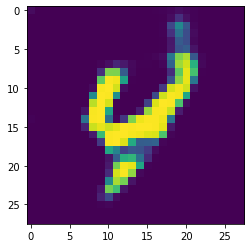

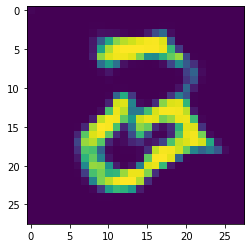

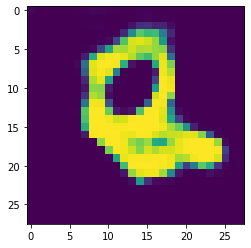

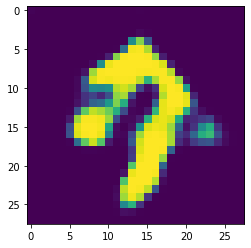

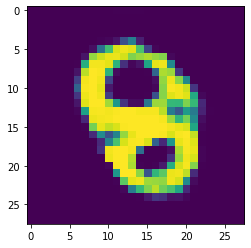

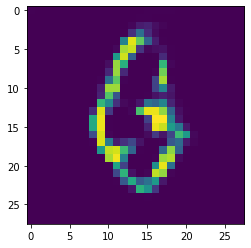

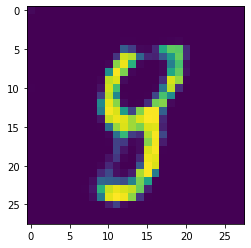

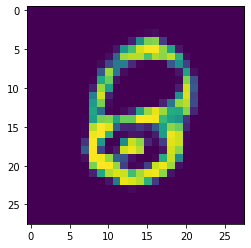

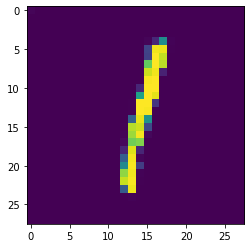

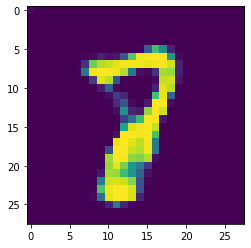

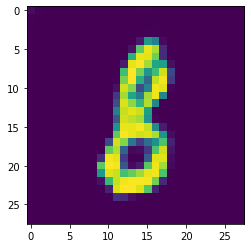

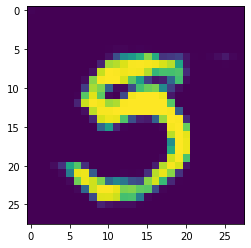

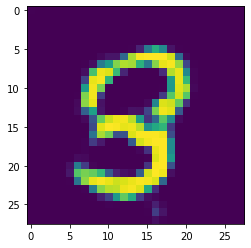

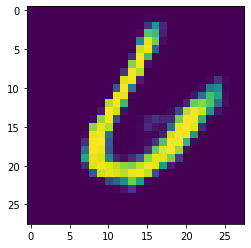

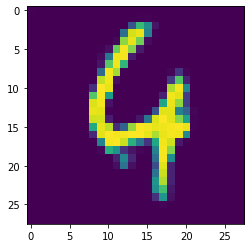

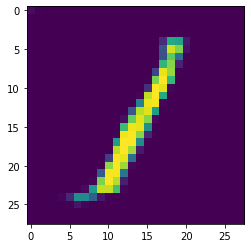

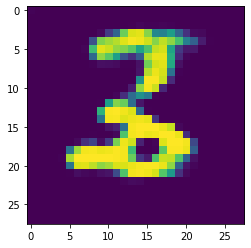

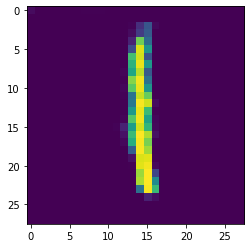

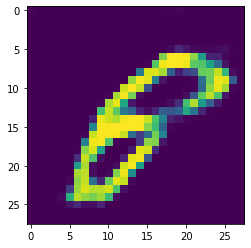

In [19]:
model.train(real_train, num_epochs=30, batch_size=60, labels=(0, 0.9))

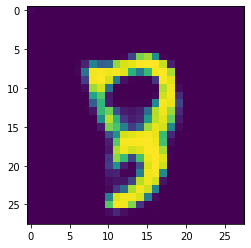

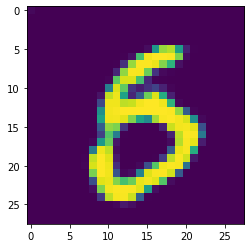

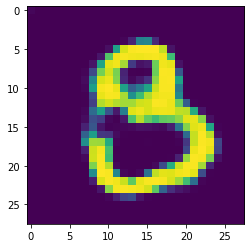

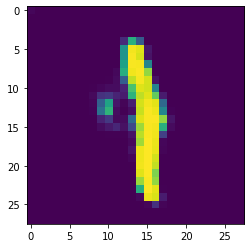

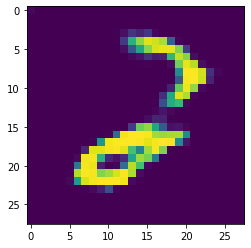

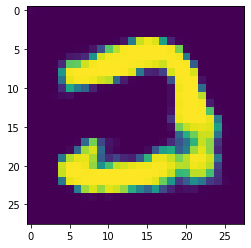

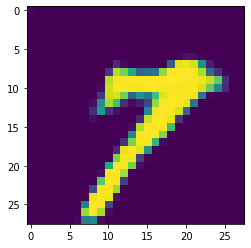

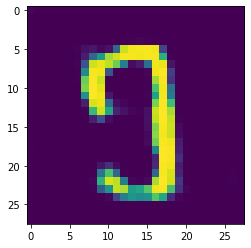

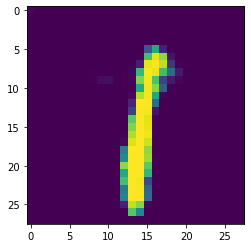

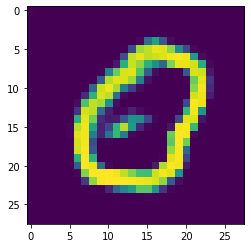

In [23]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 100))
  plt.imshow(fake_img.reshape(*model.x_shape[:-1]))
  plt.show()

We can see that the entropy of the generated images is now far more similar to the original dataset (modal collapse was prevented and the generator can consistently produce a wider range of digits).

Thus, it is clear that minibatch discrimination was a fruitful addition to the model architecture.

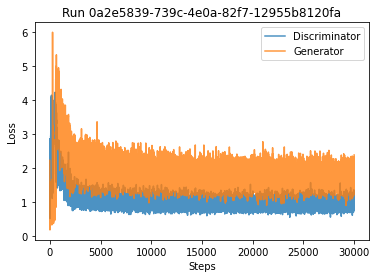

In [24]:
model.history.plot_loss()

In [ ]:
model.train(real_train, num_epochs=20, batch_size=60, labels=(0, 0.9))